In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

In [2]:
df = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/DATA/rock_density_xray.csv")
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.columns = ["Signal" , "Density"]

<Axes: xlabel='Signal', ylabel='Density'>

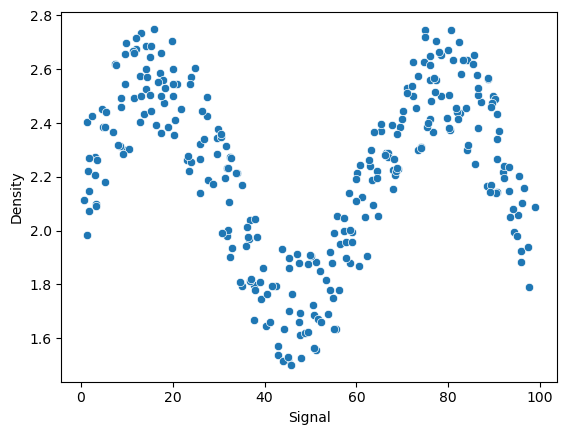

In [4]:
# plot 
sns.scatterplot(x="Signal" , y="Density", data=df)

In [6]:
X = df["Signal"].values.reshape(-1,1)
y= df["Density"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

####   ----> We will test different models to check the best fits

# LINEAR REGRESSION

In [9]:
from sklearn.linear_model import LinearRegression

# instance 
lr_model = LinearRegression()

In [10]:
lr_model.fit(X_train , y_train)

LinearRegression()

In [11]:
# predict
lr_preds = lr_model.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [13]:
# error is 
mean_absolute_error(y_test , lr_preds)

0.211198973318633

In [14]:
np.sqrt(mean_squared_error(y_test,lr_preds))   # on avarage dont seen bad ?

0.2570051996584629

In [17]:
# artificial sigma signal 
signal_range = np.arange(0,100)

In [18]:
signal_pred = lr_model.predict(signal_range.reshape(-1,1))

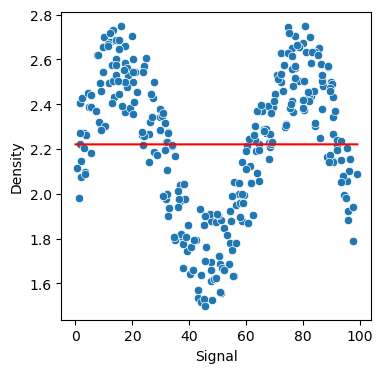

In [23]:
plt.figure(figsize=(4,4))
sns.scatterplot(x="Signal" , y="Density", data=df)

plt.plot(signal_range, signal_pred, "red")

# POLYNOMIAL REGRESSION

In [24]:
# lets create a function to run several order 

def run_model(model, X_train , y_train, X_test , y_test):   
    """
    This function run for different higher order polynomial
    """

    # Fit model
    model.fit(X_train , y_train)

    # Get metrics 
    pred  = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test , pred))
    mae = mean_absolute_error(y_test , pred)
    print(f'rmse: {rmse}')
    print(f'mae: {mae}')

    # PLOT
    signal_range = np.arange(0,100)
    signal_pred = model.predict(signal_range.reshape(-1,1))

    plt.figure(figsize=(4,4))
    sns.scatterplot(x="Signal" , y="Density", data=df)
    plt.plot(signal_range, signal_pred, "red")




rmse: 0.2570051996584629
mae: 0.211198973318633


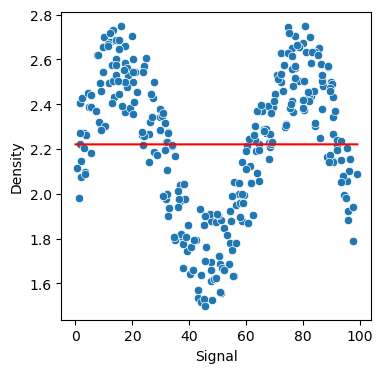

In [25]:
# test if the function works
#model = LinearRegression()
#run_model(model, X_train , y_train, X_test , y_test)


In [26]:
# create a pipeline 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [27]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

rmse: 0.2817309563725547
mae: 0.22903105443511176


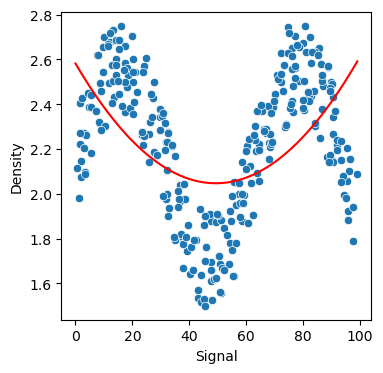

In [28]:
run_model(pipe, X_train , y_train, X_test , y_test)

rmse: 0.16269005292962874
mae: 0.14338577193990332


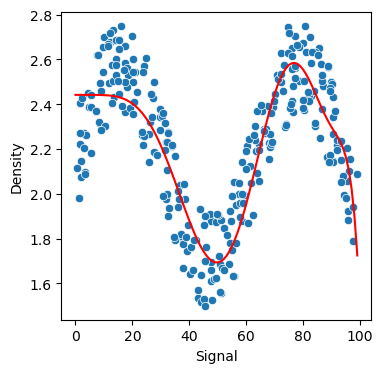

In [30]:
# lets check upt to 10 
pipe = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())
run_model(pipe, X_train , y_train, X_test , y_test)

# KNN

In [31]:
from sklearn.neighbors import KNeighborsRegressor

rmse: 0.1523487028635337
mae: 0.11877297474442378
rmse: 0.13730685016923647
mae: 0.12198383614100558
rmse: 0.13277855732740926
mae: 0.11635971693292672
rmse: 0.15954234753677107
mae: 0.13363165935705318


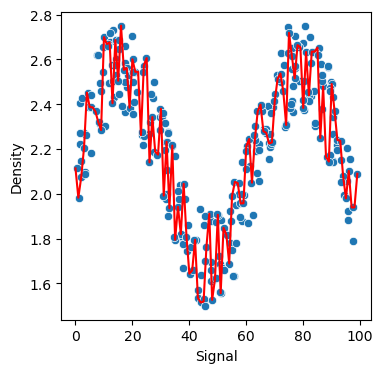

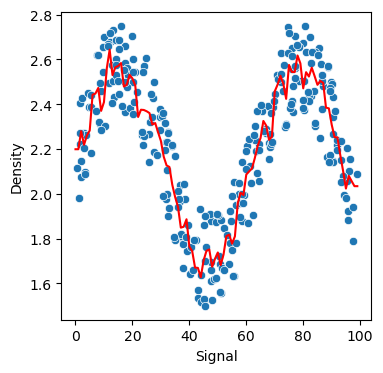

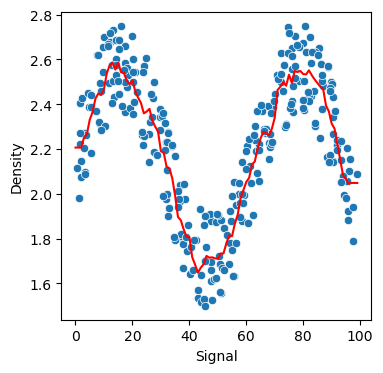

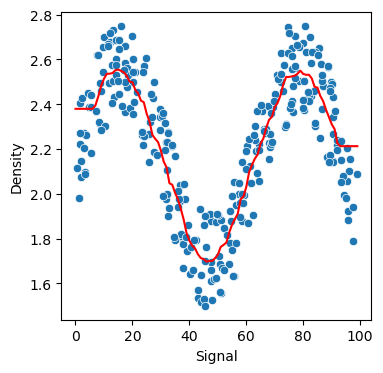

In [33]:
k_val = [1,5,10, 30]

for n in k_val:

    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train , y_train, X_test , y_test)
    

# DECISION TREE

In [34]:
from sklearn.tree import DecisionTreeRegressor

rmse: 0.1523487028635337
mae: 0.11877297474442378


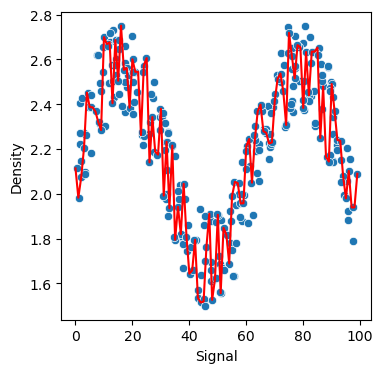

In [36]:
model = DecisionTreeRegressor()
run_model(model, X_train , y_train, X_test , y_test)

# SUPPORT VECTOR MACHINES

In [37]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV 

In [39]:
svr = SVR()
param_grid = {"C" : [0.01, 0.1 ,1 , 5, 100 , 1000],
              "gamma" : ["auto" , "scale"], 
              }
grid = GridSearchCV(svr, param_grid=param_grid)

rmse: 0.12646999302047557
mae: 0.10854210121349125


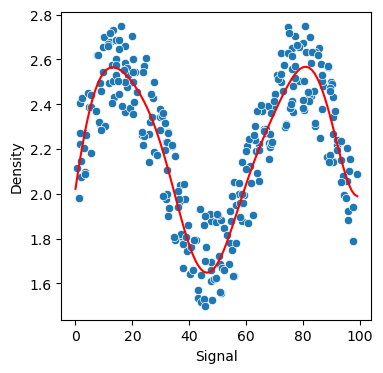

In [40]:
run_model(grid,X_train , y_train, X_test , y_test)

# RANDOM FOREST

In [41]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10)

rmse: 0.13449515294851702
mae: 0.11414535961151


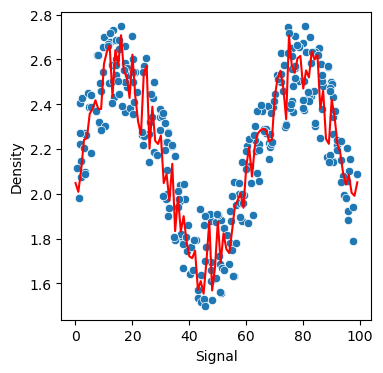

In [42]:
run_model(rfr,X_train , y_train, X_test , y_test)

# BOOSTING

In [46]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

rmse: 0.13294148649584667
mae: 0.11318284854800689


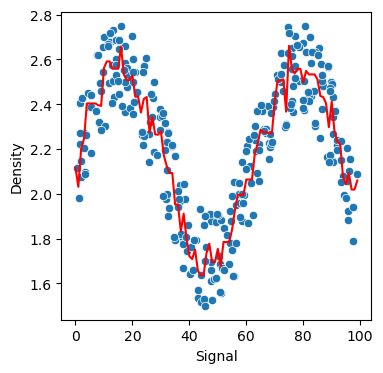

In [45]:
model = GradientBoostingRegressor()
run_model(model,X_train , y_train, X_test , y_test)


rmse: 0.14137046311190124
mae: 0.12212395300161263


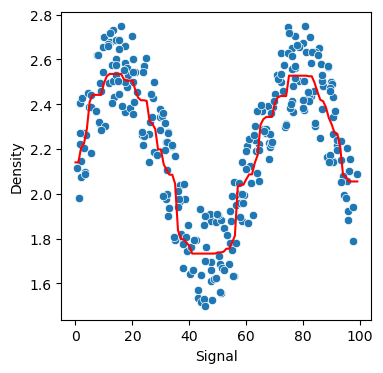

In [47]:
model = AdaBoostRegressor()
run_model(model,X_train , y_train, X_test , y_test)
